In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from calendar import monthrange
from datetime import date
import math

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Single\\"
building_id = 5
pricing = 'Fixed'

In [3]:
# Read building data:
load = pd.read_excel(ResultsFolder + "Results_includeTES_True_MgSO4_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="load")
load = load.rename(columns={'Unnamed: 0': 'Hour'})

temp = pd.read_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\weather\\ext_temp_Detroit.xlsx")
load['Outdoor Temp'] = temp['temp']

tes_discharge_MgSO4 = pd.read_excel(ResultsFolder + "Results_includeTES_True_MgSO4_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="TES")
hp_l_MgSO4 = pd.read_excel(ResultsFolder + "Results_includeTES_True_MgSO4_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="HP output")
pur_elec_MgSO4 = pd.read_excel(ResultsFolder + "Results_includeTES_True_MgSO4_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="purchased electricity")

tes_discharge_MgCl2 = pd.read_excel(ResultsFolder + "Results_includeTES_True_MgCl2_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="TES")
hp_l_MgCl2 = pd.read_excel(ResultsFolder + "Results_includeTES_True_MgCl2_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="HP output")
pur_elec_MgCl2 = pd.read_excel(ResultsFolder + "Results_includeTES_True_MgCl2_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="purchased electricity")

tes_discharge_K2CO3 = pd.read_excel(ResultsFolder + "Results_includeTES_True_K2CO3_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="TES")
hp_l_K2CO3 = pd.read_excel(ResultsFolder + "Results_includeTES_True_K2CO3_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="HP output")
pur_elec_K2CO3 = pd.read_excel(ResultsFolder + "Results_includeTES_True_K2CO3_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="purchased electricity")

tes_discharge_SrBr2 = pd.read_excel(ResultsFolder + "Results_includeTES_True_SrBr2_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="TES")
hp_l_SrBr2 = pd.read_excel(ResultsFolder + "Results_includeTES_True_SrBr2_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="HP output")
pur_elec_SrBr2 = pd.read_excel(ResultsFolder + "Results_includeTES_True_SrBr2_month_Year_NEEP50_"+pricing+"_Building_id_Size_Opt_" + str(building_id)+".xlsx", sheet_name="purchased electricity")

load['TES Discharge MgSO4'] = tes_discharge_MgSO4['TES discharge (kWh)']
load['HP to load MgSO4'] = hp_l_MgSO4['HP output to load (kWh)']
load['HP to TES MgSO4'] = hp_l_MgSO4['HP output to TES (kWh)']
load['Purchased Electricity MgSO4'] = pur_elec_MgSO4['Unnamed: 1']
load['SOC MgSO4'] = tes_discharge_MgSO4['TES SOC (kWh)']/(math.ceil(load['Load (kWh)'].max())/0.281267306*0.75)

load['TES Discharge MgCl2'] = tes_discharge_MgCl2['TES discharge (kWh)']
load['HP to load MgCl2'] = hp_l_MgCl2['HP output to load (kWh)']
load['HP to TES MgCl2'] = hp_l_MgCl2['HP output to TES (kWh)']
load['Purchased Electricity MgCl2'] = pur_elec_MgCl2['Unnamed: 1']
load['SOC MgCl2'] = tes_discharge_MgCl2['TES SOC (kWh)']/(math.ceil(load['Load (kWh)'].max())/0.084767892*0.193056)

load['TES Discharge K2CO3'] = tes_discharge_K2CO3['TES discharge (kWh)']
load['HP to load K2CO3'] = hp_l_K2CO3['HP output to load (kWh)']
load['HP to TES K2CO3'] = hp_l_K2CO3['HP output to TES (kWh)']
load['Purchased Electricity K2CO3'] = pur_elec_K2CO3['Unnamed: 1']
load['SOC K2CO3'] = tes_discharge_K2CO3['TES SOC (kWh)']/(math.ceil(load['Load (kWh)'].max())/1.646738256*0.186111)

load['TES Discharge SrBr2'] = tes_discharge_SrBr2['TES discharge (kWh)']
load['HP to load SrBr2'] = hp_l_SrBr2['HP output to load (kWh)']
load['HP to TES SrBr2'] = hp_l_SrBr2['HP output to TES (kWh)']
load['Purchased Electricity SrBr2'] = pur_elec_SrBr2['Unnamed: 1']
load['SOC SrBr2'] = tes_discharge_SrBr2['TES SOC (kWh)']/(math.ceil(load['Load (kWh)'].max())/0.811253581*0.3556)

load = load.reset_index()
load['hour'] = load['index'] + 1

idxmax, valmax = load['Load (kWh)'].agg(['idxmax', 'max'])
load

,index,Hour,Load (kWh),Outdoor Temp,TES Discharge MgSO4,HP to load MgSO4,HP to TES MgSO4,Purchased Electricity MgSO4,SOC MgSO4,TES Discharge MgCl2,...,HP to load K2CO3,HP to TES K2CO3,Purchased Electricity K2CO3,SOC K2CO3,TES Discharge SrBr2,HP to load SrBr2,HP to TES SrBr2,Purchased Electricity SrBr2,SOC SrBr2,hour
0,0,hour 1,18.226712,-16.719999,0.000000,18.226712,0.000000,14.092966,0.000000e+00,0.000000,...,18.226712,-1.421085e-14,14.092966,0.000000e+00,0.000000,18.226712,0.000000,14.092966,0.000000e+00,1
1,1,hour 2,16.987938,-16.719999,0.000000,16.987938,0.000000,13.135141,0.000000e+00,0.000000,...,16.987938,0.000000e+00,13.135141,0.000000e+00,0.000000,16.987938,0.000000,13.135141,0.000000e+00,2
2,2,hour 3,17.211558,-16.719999,0.000000,17.211558,0.000000,13.308045,0.000000e+00,0.000000,...,17.211558,0.000000e+00,13.308045,0.000000e+00,0.000000,17.211558,0.000000,13.308045,0.000000e+00,3
3,3,hour 4,17.015076,-15.610000,0.000000,17.015076,0.000000,9.248911,0.000000e+00,0.000000,...,17.015076,1.088706e+01,15.166807,3.440370e+00,0.000000,17.015076,10.887061,15.166807,8.870488e-01,4
4,4,hour 5,17.024729,-15.000000,0.000000,17.024729,10.877408,13.747540,1.456885e-01,0.000000,...,17.024729,1.087741e+01,13.747540,6.877690e+00,0.000000,17.024729,10.877408,13.747540,1.773311e+00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,hour 8756,10.927158,5.000000,0.000610,10.926548,0.000000,3.104133,8.172226e-06,0.000152,...,10.927132,0.000000e+00,3.104299,8.354454e-06,0.000026,10.927132,0.000000,3.104299,2.154073e-06,8756
8756,8756,hour 8757,10.946176,5.000000,0.000302,10.945874,0.000000,3.109623,4.044839e-06,0.000075,...,10.946163,0.000000e+00,3.109705,4.135033e-06,0.000013,10.946163,0.000000,3.109705,1.066157e-06,8757
8757,8757,hour 8758,11.004044,6.110000,0.000149,11.003894,0.000000,3.046145,2.001991e-06,0.000037,...,11.004037,0.000000e+00,3.046185,2.046632e-06,0.000006,11.004037,0.000000,3.046185,5.276940e-07,8758
8758,8758,hour 8759,11.873651,8.890000,0.000074,11.873577,0.000000,3.085970,9.908845e-07,0.000018,...,11.873648,0.000000e+00,3.085988,1.012980e-06,0.000003,11.873648,0.000000,3.085988,2.611819e-07,8759


In [4]:
# Graphing:
mon_to_run = 1
year = 2018

if mon_to_run == 'Year':
    day = 365                                   # Equivalent days
    starting_day = 0
else:
    day = monthrange(year, mon_to_run)[1]       # number of days in specified month
    starting_day = (date(year, mon_to_run, 1) - date(year, 1, 1)).days

hour = day * 24
#starting_hour = starting_day * 24
#end_hour = starting_hour + hour
starting_hour = int(idxmax) - 168/2
end_hour = int(idxmax) + 168/2

# Get COP:
load_cop50_raw = pd.read_excel('C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\cop_temp.xlsx', sheet_name='cop NEEP50')
load['COP'] = 0.000

for i in list(range(len(load['Outdoor Temp']))):
    load_cop50_raw['temp_diff'] = abs(load['Outdoor Temp'][i] - load_cop50_raw['temp C'])
    min_id50 = load_cop50_raw['temp_diff'].idxmin(axis=0)
    load['COP'][i] = float(load_cop50_raw['COP NEEP50'][min_id50])
load

C:\Users\atpha\AppData\Local\Temp\ipykernel_21700\3814631147.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load['COP'][i] = float(load_cop50_raw['COP NEEP50'][min_id50])


,index,Hour,Load (kWh),Outdoor Temp,TES Discharge MgSO4,HP to load MgSO4,HP to TES MgSO4,Purchased Electricity MgSO4,SOC MgSO4,TES Discharge MgCl2,...,HP to TES K2CO3,Purchased Electricity K2CO3,SOC K2CO3,TES Discharge SrBr2,HP to load SrBr2,HP to TES SrBr2,Purchased Electricity SrBr2,SOC SrBr2,hour,COP
0,0,hour 1,18.226712,-16.719999,0.000000,18.226712,0.000000,14.092966,0.000000e+00,0.000000,...,-1.421085e-14,14.092966,0.000000e+00,0.000000,18.226712,0.000000,14.092966,0.000000e+00,1,1.293320
1,1,hour 2,16.987938,-16.719999,0.000000,16.987938,0.000000,13.135141,0.000000e+00,0.000000,...,0.000000e+00,13.135141,0.000000e+00,0.000000,16.987938,0.000000,13.135141,0.000000e+00,2,1.293320
2,2,hour 3,17.211558,-16.719999,0.000000,17.211558,0.000000,13.308045,0.000000e+00,0.000000,...,0.000000e+00,13.308045,0.000000e+00,0.000000,17.211558,0.000000,13.308045,0.000000e+00,3,1.293320
3,3,hour 4,17.015076,-15.610000,0.000000,17.015076,0.000000,9.248911,0.000000e+00,0.000000,...,1.088706e+01,15.166807,3.440370e+00,0.000000,17.015076,10.887061,15.166807,8.870488e-01,4,1.839684
4,4,hour 5,17.024729,-15.000000,0.000000,17.024729,10.877408,13.747540,1.456885e-01,0.000000,...,1.087741e+01,13.747540,6.877690e+00,0.000000,17.024729,10.877408,13.747540,1.773311e+00,5,2.029609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,hour 8756,10.927158,5.000000,0.000610,10.926548,0.000000,3.104133,8.172226e-06,0.000152,...,0.000000e+00,3.104299,8.354454e-06,0.000026,10.927132,0.000000,3.104299,2.154073e-06,8756,3.520000
8756,8756,hour 8757,10.946176,5.000000,0.000302,10.945874,0.000000,3.109623,4.044839e-06,0.000075,...,0.000000e+00,3.109705,4.135033e-06,0.000013,10.946163,0.000000,3.109705,1.066157e-06,8757,3.520000
8757,8757,hour 8758,11.004044,6.110000,0.000149,11.003894,0.000000,3.046145,2.001991e-06,0.000037,...,0.000000e+00,3.046185,2.046632e-06,0.000006,11.004037,0.000000,3.046185,5.276940e-07,8758,3.612400
8758,8758,hour 8759,11.873651,8.890000,0.000074,11.873577,0.000000,3.085970,9.908845e-07,0.000018,...,0.000000e+00,3.085988,1.012980e-06,0.000003,11.873648,0.000000,3.085988,2.611819e-07,8759,3.847600


In [5]:
load_truncated = load.truncate(before=starting_hour, after=end_hour)
import seaborn as sns
plt.style.use("seaborn")
#colors = sns.color_palette("Pastel1", 3)
colors = ["#9dc6e0", "#004c6d"]
sns.set_style(style='white')

load_truncated

,index,Hour,Load (kWh),Outdoor Temp,TES Discharge MgSO4,HP to load MgSO4,HP to TES MgSO4,Purchased Electricity MgSO4,SOC MgSO4,TES Discharge MgCl2,...,HP to TES K2CO3,Purchased Electricity K2CO3,SOC K2CO3,TES Discharge SrBr2,HP to load SrBr2,HP to TES SrBr2,Purchased Electricity SrBr2,SOC SrBr2,hour,COP
41,41,hour 42,15.153540,-15.000000,0.000000,15.153540,0.465103,7.695393,0.993336,0.000000,...,0.000000,7.466235,8.848151,0.0,15.153540,0.000000,7.466235,2.281366,42,2.029609
42,42,hour 43,16.083519,-15.610000,0.000000,16.083519,0.339177,8.926909,0.997879,0.000000,...,0.000000,8.742542,8.848151,0.0,16.083519,0.000000,8.742542,2.281366,43,1.839684
43,43,hour 44,16.926188,-16.110001,0.000000,16.926188,0.158391,10.375715,1.000000,0.000000,...,0.000000,10.279522,8.848151,0.0,16.926188,0.000000,10.279522,2.281366,44,1.646593
44,44,hour 45,17.487432,-16.110001,0.000000,17.487432,0.000000,10.620373,1.000000,0.000000,...,0.000000,10.620373,8.848151,0.0,17.487432,0.000000,10.620373,2.281366,45,1.646593
45,45,hour 46,17.672383,-16.719999,7.340717,10.331667,0.000000,7.988486,0.899674,3.622707,...,0.000000,13.664357,8.848151,0.0,17.672383,0.000000,13.664357,2.281366,46,1.293320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,hour 206,17.602722,2.780000,0.000000,17.602722,10.299415,8.365956,0.491357,0.000000,...,10.299415,8.365956,6.598747,0.0,17.602722,10.299415,8.365956,1.701390,206,3.335200
206,206,hour 207,17.415667,1.720000,0.000000,17.415667,10.486470,8.604335,0.631810,0.000000,...,7.118246,7.565657,8.848151,0.0,17.415667,5.168737,6.964476,2.122525,207,3.242800
207,207,hour 208,17.580820,1.720000,0.000000,17.580820,7.647281,7.779728,0.734235,0.000000,...,0.000000,5.421494,8.848151,0.0,17.580820,1.588581,5.911373,2.251958,208,3.242800
208,208,hour 209,17.955856,1.110000,0.000000,17.955856,5.576796,7.371461,0.808929,0.000000,...,0.000000,5.624563,8.848151,0.0,17.955856,0.360927,5.737621,2.281366,209,3.192400


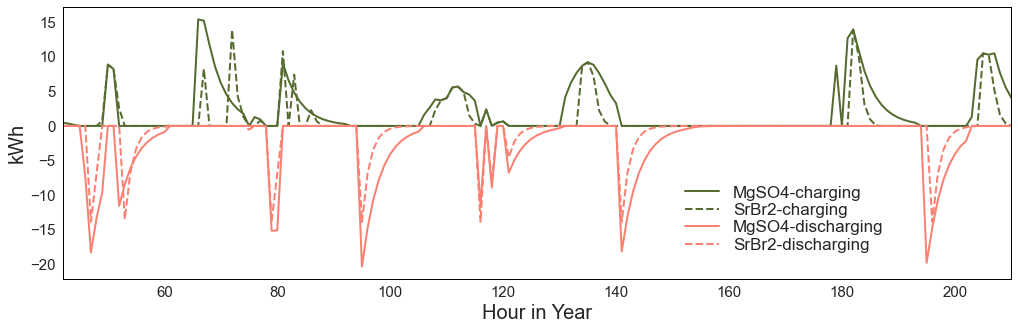

In [10]:
# Graphing charging vs discharging:
fig, ax1 = plt.subplots(figsize=(17,5))
plt.plot(load_truncated['hour'], load_truncated['HP to TES MgSO4'], "-", label = "MgSO4-charging",linewidth=2, color='darkolivegreen')
plt.plot(load_truncated['hour'], load_truncated['HP to TES SrBr2'], "--", label = "SrBr2-charging",linewidth=2, color='darkolivegreen')
plt.plot(load_truncated['hour'], -load_truncated['TES Discharge MgSO4'], "-", label = "MgSO4-discharging",linewidth=2, color='salmon')
plt.plot(load_truncated['hour'], -load_truncated['TES Discharge SrBr2'], "--", label = "SrBr2-discharging",linewidth=2, color='salmon')

plt.legend(loc='best', bbox_to_anchor=(0.64, 0.4), labelspacing=0.14, fontsize=17)
plt.xlabel("Hour in Year",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("kWh", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
#plt.ylim(0,27)
plt.xlim(load_truncated['hour'].min(),load_truncated['hour'].max())

#ax2 = ax1.twinx()
#ax2.plot(load_truncated['hour'], load_truncated['COP'], label = "COP", color='saddlebrown')
#ax2.plot(load_truncated['hour'], load_truncated['Outdoor Temp'], label = "Outdoor Temp", color='orange',linewidth=3)
#plt.ylabel("COP", fontsize=20, color='saddlebrown')
#plt.yticks(fontsize=15)
#plt.legend(loc='lower right', fontsize=17)

#ax2 = ax1.twinx()
#ax2.plot(load_truncated['hour'], load_truncated['SOC'], label = "SOC", color='lightsteelblue')
#ax2.plot(load_truncated['hour'], load_truncated['Outdoor Temp'], label = "Outdoor Temp", color='orange',linewidth=3)
#plt.ylabel("SOC", fontsize=20, color='lightsteelblue')
#plt.yticks(fontsize=15)
#plt.legend(loc='upper right', fontsize=17)
fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/soc_all.png', dpi=300,bbox_inches='tight')